In [1]:
import csv
 
#read file, for example
file_path = 'C:/Users/chenxihui/Desktop/code/project/2010.csv'
file = open(file_path)
data = []
for i in file.readlines():
    data.append(i)
file.close()

In [3]:
new_data = []
for row in data:
    tmp = row.strip('\n')  #去掉每行最后的回车符
    tmp = tmp.split(',')   #根据','来分割字符串，使之成为含有一个个数据的列表
    new_data.append(tmp)   #new_data的每一行数据就是一个列表

In [4]:
select_data = []
length=len(new_data)
for i in range(length):
    if(new_data[i][0]=='2' or new_data[i][0]=='13' or new_data[i][0]=='14' or new_data[i][0]=='20' or new_data[i][0]=='33' or new_data[i][0]=='35' or new_data[i][0]=='38' or new_data[i][0]=='39' or new_data[i][0]=='56' or new_data[i][0]=='69' or new_data[i][0]=='73' or new_data[i][0]=='74' or new_data[i][0]=='75' or new_data[i][0]=='82' or new_data[i][0]=='87' or new_data[i][0]=='88' or new_data[i][0]=='101' or new_data[i][0]=='104' or new_data[i][0]=='106' or new_data[i][0]=='109' or new_data[i][0]=='110' or new_data[i][0]=='119' or new_data[i][0]=='124' or new_data[i][0]=='130' or new_data[i][0]=='137' or new_data[i][0]=='141' or new_data[i][0]=='144' or new_data[i][0]=='152' or new_data[i][0]=='153' or new_data[i][0]=='157' or new_data[i][0]=='161' or new_data[i][0]=='169' or new_data[i][0]=='176' or new_data[i][0]=='184' or new_data[i][0]=='188' or new_data[i][0]=='189' or new_data[i][0]=='193' or new_data[i][0]=='201' or new_data[i][0]=='202' or new_data[i][0]=='204' or new_data[i][0]=='206' or new_data[i][0]=='207' or new_data[i][0]=='210' or new_data[i][0]=='211' or new_data[i][0]=='212' or new_data[i][0]=='214' or new_data[i][0]=='218' or new_data[i][0]=='244' or new_data[i][0]=='246' or new_data[i][0]=='253' or new_data[i][0]=='256' or new_data[i][0]=='273' or new_data[i][0]=='276' or new_data[i][0]=='297'):
        select_data.append(new_data[i][3:])#[5:]

In [5]:
GC=[]
CL=[]
GG=[]
Length_select_data = len(select_data)
for i in range(Length_select_data):
    if(select_data[i][0]=='GC'):
        GC.append(select_data[i][2:])
    elif(select_data[i][0]=='CL'):
        CL.append(select_data[i][2:])
    else:
        GG.append(select_data[i][2:])

In [6]:
import numpy as np

GC_temp=np.array(GC)
GC_array=[]
GC_array = GC_temp.astype(np.float)#春季有90天，夏季有91天，秋有92天，冬有92天

CL_temp=np.array(CL)
CL_array=[]
CL_array = CL_temp.astype(np.float)

GG_temp=np.array(GG)
GG_array=[]
GG_array = GG_temp.astype(np.float)
GG_array[1]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.031, 0.063, 0.069,
       0.069, 0.15 , 0.125, 0.125, 0.119, 0.125, 0.088, 0.069, 0.075,
       0.063, 0.038, 0.05 , 0.044, 0.031, 0.006, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   ])

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:
from collections import defaultdict
from random import uniform
from math import sqrt



def point_avg(points):
    """
    Accepts a list of points, each with the same number of dimensions.
    NB. points can have more dimensions than 2
    
    Returns a new point which is the center of all the points.
    """
    dimensions = len(points[0])

    new_center = []

    for dimension in range(dimensions):
        dim_sum = 0  # dimension sum
        for p in points:
            dim_sum += p[dimension]

        # average of each dimension
        new_center.append(dim_sum / float(len(points)))

    return new_center


def update_centers(data_set, assignments):
    """
    Accepts a dataset and a list of assignments; the indexes 
    of both lists correspond to each other.
    Compute the center for each of the assigned groups.
    Return `k` centers where `k` is the number of unique assignments.
    """
    new_means = defaultdict(list)
    centers = []
    for assignment, point in zip(assignments, data_set):
        new_means[assignment].append(point)
        
    for points in new_means.values():
        centers.append(point_avg(points))

    return centers


def assign_points(data_points, centers):
    """
    Given a data set and a list of points betweeen other points,
    assign each point to an index that corresponds to the index
    of the center point on it's proximity to that point. 
    Return a an array of indexes of centers that correspond to
    an index in the data set; that is, if there are N points
    in `data_set` the list we return will have N elements. Also
    If there are Y points in `centers` there will be Y unique
    possible values within the returned list.
    """
    assignments = []
    for point in data_points:
        shortest = (1000)  # positive infinity
        shortest_index = 0
        for i in range(len(centers)):
            val = distance(point, centers[i])
            if(val < shortest):
                shortest = val
                shortest_index = i
        assignments.append(shortest_index)
    return assignments


def distance(a, b):
    """
    """
    dimensions = len(a)
    
    _sum = 0
    for dimension in range(dimensions):
        difference_sq = (a[dimension] - b[dimension]) ** 2
        _sum += difference_sq
    return sqrt(_sum)


def generate_k(data_set, k):
    """
    Given `data_set`, which is an array of arrays,
    find the minimum and maximum for each coordinate, a range.
    Generate `k` random points between the ranges.
    Return an array of the random points within the ranges.
    """
    centers = []
    dimensions = len(data_set[0])
    min_max = defaultdict(int)

    for point in data_set:
        for i in range(dimensions):
            val = point[i]
            min_key = 'min_%d' % i
            max_key = 'max_%d' % i
            if min_key not in min_max or val < min_max[min_key]:
                min_max[min_key] = val
            if max_key not in min_max or val > min_max[max_key]:
                min_max[max_key] = val

    for _k in range(k):
        rand_point = []
        for i in range(dimensions):
            min_val = min_max['min_%d' % i]
            max_val = min_max['max_%d' % i]
            
            rand_point.append(uniform(min_val, max_val))

        centers.append(rand_point)

    return centers


def k_means(dataset, k):
    k_points = generate_k(dataset, k)
    assignments = assign_points(dataset, k_points)
    old_assignments = None
    centers_history = []
    while assignments != old_assignments:
        new_centers = update_centers(dataset, assignments)
        centers_history.append(new_centers)
        old_assignments = assignments
        assignments = assign_points(dataset, new_centers)#centers_history[-1]

    return zip(assignments, dataset),centers_history

In [9]:
out,final_center = k_means(GC_array, 5)
list = []   # so, we need to show it in list
for i in out:
    list.append(i)
print(list[0])

(0, array([0.085, 0.142, 0.082, 0.119, 0.105, 0.088, 0.139, 0.057, 0.139,
       0.089, 0.098, 0.116, 0.067, 0.132, 0.16 , 0.391, 1.638, 1.557,
       0.579, 0.21 , 0.432, 0.606, 0.199, 0.35 , 0.25 , 0.19 , 0.172,
       0.19 , 0.148, 0.363, 0.115, 0.21 , 0.1  , 0.172, 0.079, 0.388,
       2.164, 2.035, 0.783, 0.859, 0.402, 0.283, 0.195, 0.297, 0.203,
       0.303, 0.307, 0.179]))


In [33]:
dist1=[]
dist2=[]
dist3=[]
dist4=[]
dist5=[]
label_pred=[]
points=[]
length_list=len(list)
for i in range(length_list):
    if(list[i][0]==0):
        dist1.append(distance(GC_array[i],final_center[-1][0]))
    elif(list[i][0]==1):
        dist2.append(distance(GC_array[i],final_center[-1][1]))
    elif(list[i][0]==2):
        dist3.append(distance(GC_array[i],final_center[-1][2]))
    elif(list[i][0]==3):
        dist4.append(distance(GC_array[i],final_center[-1][3]))
    elif(list[i][0]==4):
        dist5.append(distance(GC_array[i],final_center[-1][4]))
dist1[0]

3.035873705856248

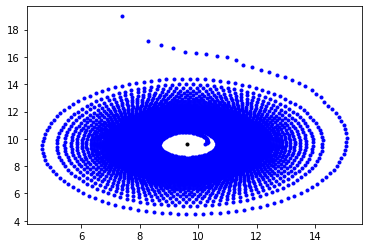

In [34]:
import numpy as np
dist11=dist1
dist11.sort()
max_dist11=dist11[-1]
len_dist11=len(dist11)
for i in range(len_dist11):
    theta=(i+1)*360/(len_dist11+1)
    x=max_dist11+dist11[i]*np.cos(theta)
    y=max_dist11+dist11[i]*np.sin(theta)
    plt.plot(x,y,c='b',marker='.')
plt.plot(max_dist11, max_dist11, c='k', marker='.')
plt.show()

In [13]:
for i in range(length_list):
    label_pred.append(list[i][0])
    points.append(list[i][1:])
points[1]

(array([0.085, 0.142, 0.082, 0.119, 0.105, 0.088, 0.139, 0.057, 0.139,
        0.089, 0.098, 0.116, 0.067, 0.132, 0.16 , 0.391, 1.638, 1.557,
        0.579, 0.21 , 0.432, 0.606, 0.199, 0.35 , 0.25 , 0.19 , 0.172,
        0.19 , 0.148, 0.363, 0.115, 0.21 , 0.1  , 0.172, 0.079, 0.388,
        2.164, 2.035, 0.783, 0.859, 0.402, 0.283, 0.195, 0.297, 0.203,
        0.303, 0.307, 0.179]),)

In [18]:
len(final_center[-1][3])

48

In [21]:
len(GC_array[1])

48

In [31]:
list[1][0]

1

In [35]:
print(list[3])

(2, array([0.391, 0.378, 0.13 , 0.2  , 0.202, 0.134, 0.171, 0.152, 0.149,
       0.137, 0.166, 0.111, 0.178, 0.101, 0.148, 0.138, 0.727, 1.555,
       1.518, 1.737, 1.51 , 1.54 , 1.526, 1.575, 1.179, 0.313, 0.331,
       0.273, 0.341, 0.366, 0.311, 0.278, 0.312, 0.265, 1.386, 1.735,
       1.78 , 0.654, 0.422, 0.361, 1.072, 1.631, 1.557, 1.301, 1.309,
       1.368, 1.582, 0.533]))


In [38]:
print(distance(GC_array[3],final_center[-1][0]))
print(distance(GC_array[3],final_center[-1][1]))
print(distance(GC_array[3],final_center[-1][2]))
print(distance(GC_array[3],final_center[-1][3]))
print(distance(GC_array[3],final_center[-1][4]))

4.35699170897343
4.199268363462646
3.98575809218788
5.383674201085673
6.832245999011432


In [39]:
GC_array[3]

array([0.391, 0.378, 0.13 , 0.2  , 0.202, 0.134, 0.171, 0.152, 0.149,
       0.137, 0.166, 0.111, 0.178, 0.101, 0.148, 0.138, 0.727, 1.555,
       1.518, 1.737, 1.51 , 1.54 , 1.526, 1.575, 1.179, 0.313, 0.331,
       0.273, 0.341, 0.366, 0.311, 0.278, 0.312, 0.265, 1.386, 1.735,
       1.78 , 0.654, 0.422, 0.361, 1.072, 1.631, 1.557, 1.301, 1.309,
       1.368, 1.582, 0.533])